In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import seaborn as sns

In [0]:
train = pd.read_csv('train_no_missing_outlier.csv')
del train['id']
del train['open_date']

In [0]:
target='flag'
train['flag'].value_counts()
x_columns=[x for x in train.columns if x not in [target] ]
X_tot=train[x_columns]
X=X_tot.drop(columns=['caller_sum_45','caller_sum_456','record_sum_45','record_sum_456','time_sum_45','time_sum_456'])
y=train['flag']

In [0]:
#feature correlation
Cor = X.iloc[:,0:12]
Cor_matrxi = Cor.corr(method='pearson', min_periods=1)
print(Cor_matrxi)

              caller_sum_6  record_sum_6  time_sum_6  caller_sum_4  \
caller_sum_6      1.000000      0.899436    0.640460      0.932939   
record_sum_6      0.899436      1.000000    0.787968      0.837034   
time_sum_6        0.640460      0.787968    1.000000      0.588625   
caller_sum_4      0.932939      0.837034    0.588625      1.000000   
record_sum_4      0.861683      0.945681    0.736163      0.888304   
time_sum_4        0.607670      0.736485    0.894547      0.619203   
caller_sum_5      0.988448      0.879877    0.623375      0.909862   
record_sum_5      0.891022      0.990162    0.781977      0.815479   
time_sum_5        0.630237      0.774673    0.975659      0.569590   
brand            -0.225021     -0.244006   -0.143494     -0.221629   
city_flag         0.049103      0.028612    0.030854      0.048378   
day               0.274198      0.273085    0.135940      0.270067   

              record_sum_4  time_sum_4  caller_sum_5  record_sum_5  \
caller_sum_6      0

In [0]:
con=['caller_sum_6','record_sum_6','time_sum_6','caller_sum_4','record_sum_4','time_sum_4', 'caller_sum_5','record_sum_5','time_sum_5','brand','city_flag','day']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

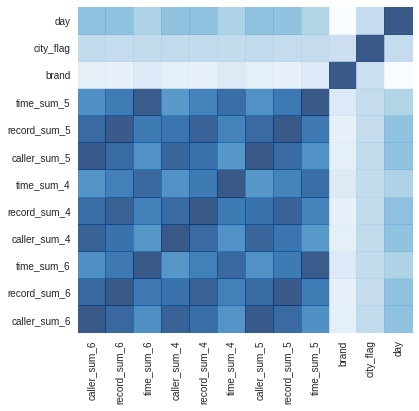

In [0]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(Cor_matrxi, cmap=plt.cm.Blues, alpha=0.8)
fig = plt.gcf()
fig.set_size_inches(6, 6)
ax.set_frame_on(False)
ax.set_yticks(np.arange(12) + 0.5, minor=False)
ax.set_xticks(np.arange(12) + 0.5, minor=False)
ax.set_xticklabels(con[0:12], minor=False)
ax.set_yticklabels(con[0:12], minor=False)
plt.xticks(rotation=90)

In [0]:
#fueature selection
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
for feature in zip(con, clf.feature_importances_):
    print(feature)

('caller_sum_6', 0.05577115363254538)
('record_sum_6', 0.07543148948599371)
('time_sum_6', 0.09159818704399918)
('caller_sum_4', 0.06323701954085767)
('record_sum_4', 0.09033910034167696)
('time_sum_4', 0.10115940353609787)
('caller_sum_5', 0.06170416169808261)
('record_sum_5', 0.10729892385093547)
('time_sum_5', 0.09471643332720976)
('brand', 0.025876862751425388)
('city_flag', 0.00970467822997881)
('day', 0.2231625865611972)


In [0]:
sfm = SelectFromModel(clf, threshold=0.05)
sfm.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.05)

In [0]:
#what are important features
con=['caller_sum_6','record_sum_6','time_sum_6','caller_sum_4','record_sum_4','time_sum_4', 'caller_sum_5','record_sum_5','time_sum_5','brand','city_flag','day']
for feature_list_index in sfm.get_support(indices=True):
    print(con[feature_list_index])

caller_sum_6
record_sum_6
time_sum_6
caller_sum_4
record_sum_4
time_sum_4
caller_sum_5
record_sum_5
time_sum_5
day


In [0]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [ ]:
clf_important = RandomForestClassifier()
y_pred = clf_important.predict(X_important_test)
accuracy_score(y_test, y_pred)

In [0]:
y_pred = clf_important.predict(X_important_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [0]:
accuracy_score(y_test, y_pred)

In [0]:
from pandas import DataFrame
X_xx=DataFrame(X_important_test)

In [0]:
X_xx.to_csv('feature selection from random forest.csv')

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
model_important=GradientBoostingClassifier()
model_important.fit(X_important_train, y_train)

In [0]:
y_pred = model_important.predict(X_important_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [0]:
y_pred = clf.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [0]:

xx=['day','record_sum_5','caller_sum_5','record_sum_6','record_sum_4', 'brand','time_sum_5','time_sum_4','caller_sum_4','city_flag']
X=train[xx]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc